In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ELU, LeakyReLU
from keras import models, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128

In [3]:
#paths
train_data_dir = r'D/American Sign Language Recognition/dataSet/trainingData'
validation_data_dir = r'D/American Sign Language Recognition/dataSet/testingData'

In [4]:
#CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(sz,sz, 1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#Dense Neural Net 
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(96))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(27))
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory('dataSet/trainingData',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 12845 images belonging to 27 classes.


In [10]:
test_set = test_datagen.flow_from_directory('dataSet/testingData',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 4268 images belonging to 27 classes.


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(training_set,
        steps_per_epoch=len(training_set),  # No of images in training set
        epochs=10,
        validation_data=test_set,
        validation_steps=len(test_set))  # No of images in test set


Epoch 1/10
1285/1285 [==============================] - 380s 296ms/step - loss: 0.1081 - accuracy: 0.9675 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 2/10
1285/1285 [==============================] - 242s 188ms/step - loss: 0.1047 - accuracy: 0.9684 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 3/10
1285/1285 [==============================] - 189s 147ms/step - loss: 0.1011 - accuracy: 0.9718 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 4/10
1285/1285 [==============================] - 255s 198ms/step - loss: 0.0915 - accuracy: 0.9742 - val_loss: 0.0028 - val_accuracy: 0.9988
Epoch 5/10
1285/1285 [==============================] - 186s 144ms/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/10
1285/1285 [==============================] - 144s 112ms/step - loss: 0.0805 - accuracy: 0.9772 - val_loss: 4.3739e-04 - val_accuracy: 0.9998
Epoch 7/10
1285/1285 [==============================] - 146s 113ms/step - loss: 0.0705 - accuracy: 0.9784 - 

In [14]:
nb_validation_samples=len(test_set)
batch_size=10

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

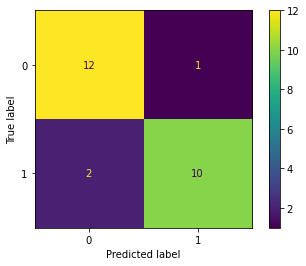

In [16]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

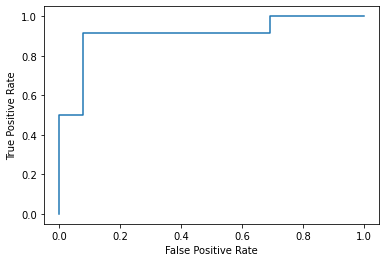

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()